# Turnout by Age

In [8]:
# %matplotlib ipympl
from datetime import timedelta

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ma_voter_analysis.plotting import *
from ma_voter_analysis.processing import *

In [2]:
MUNICIPAL_YEARS = np.arange(2011, 2023, 2)
STATE_YEARS = np.arange(2012, 2023, 2)
NATIONAL_YEARS = np.arange(2012, 2023, 4)
ALL_YEARS = np.arange(2011, 2023, 1)

In [19]:
voters = pd.read_csv(
    "../../data/cambridge/general-vote-history.csv", low_memory=False
).set_index(["year", "Voter ID Number"])
age_grouped = turnout_by_year_key(voters, "age", 4)

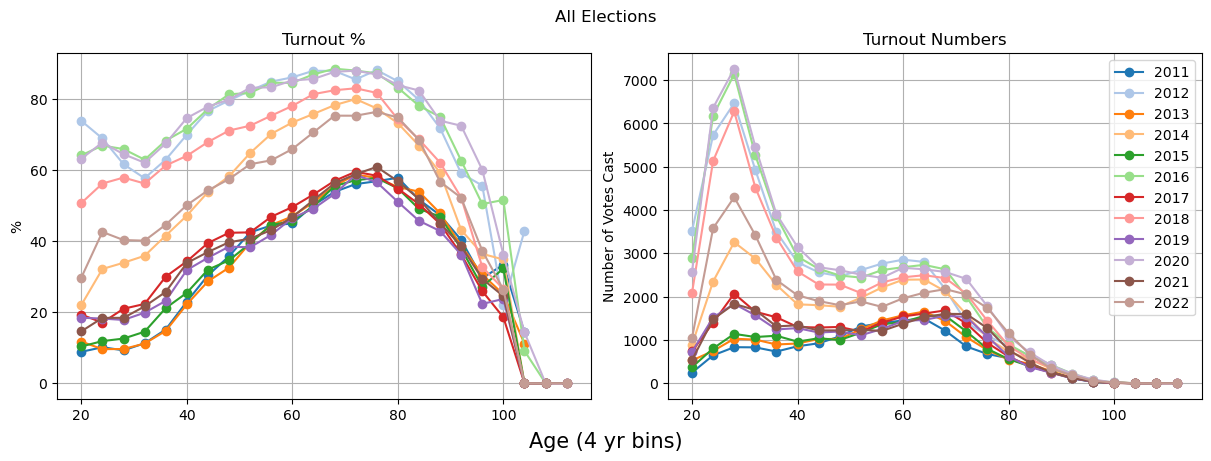

In [22]:
import cmasher

YEAR_COLORS = {
    year: color for year, color in zip(ALL_YEARS, plt.get_cmap("tab20").colors)
}
# YEAR_COLORS= {year:color for year,color in zip(ALL_YEARS, cmasher.take_cmap_colors('tab20', len(ALL_YEARS)))}


def line_plot_age_turnout(df, years, low_alpha_years=None):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4.5), constrained_layout=True)

    if low_alpha_years is None:
        low_alpha_years = []
    for year in years:
        if year in low_alpha_years:
            alpha = 0.5
            # alpha =1
            linestyle = "--"
        else:
            alpha = 1
            linestyle = "-"

        axs[0].plot(
            df.loc[year]["mid_points"].values,
            df.loc[year]["turnout"].values * 100,
            "o",
            color=YEAR_COLORS[year][:3],
            linestyle=linestyle,
            label=year,
            alpha=alpha,
        )
        axs[1].plot(
            df.loc[year]["mid_points"].values,
            df.loc[year]["voted"].values,
            "o",
            color=YEAR_COLORS[year][:3],
            linestyle=linestyle,
            label=year,
            alpha=alpha,
        )
    axs[0].set_title("Turnout %")
    axs[1].set_title("Turnout Numbers")
    axs[0].set_ylabel("%")
    axs[1].set_ylabel("Number of Votes Cast")
    labelsize = 15
    axs[0].grid()
    axs[1].grid()
    fig.supxlabel("Age (4 yr bins)", size=labelsize)
    plt.legend()
    return fig, axs


fig, axs = line_plot_age_turnout(age_grouped, ALL_YEARS)
fig.suptitle("All Elections");
# plt.savefig("all-elec-line.png")

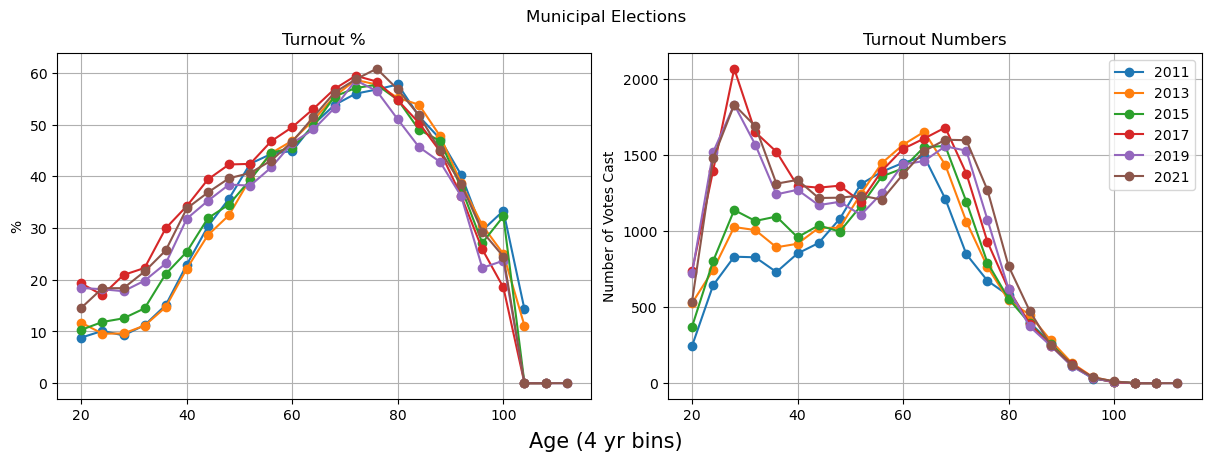

In [23]:
fig, axs = line_plot_age_turnout(age_grouped, MUNICIPAL_YEARS)
fig.suptitle("Municipal Elections");
# fig, axs =line_plot_age_turnout(age_grouped, STATE_YEARS)
# fig, axs =line_plot_age_turnout(age_grouped, NATIONAL_YEARS)

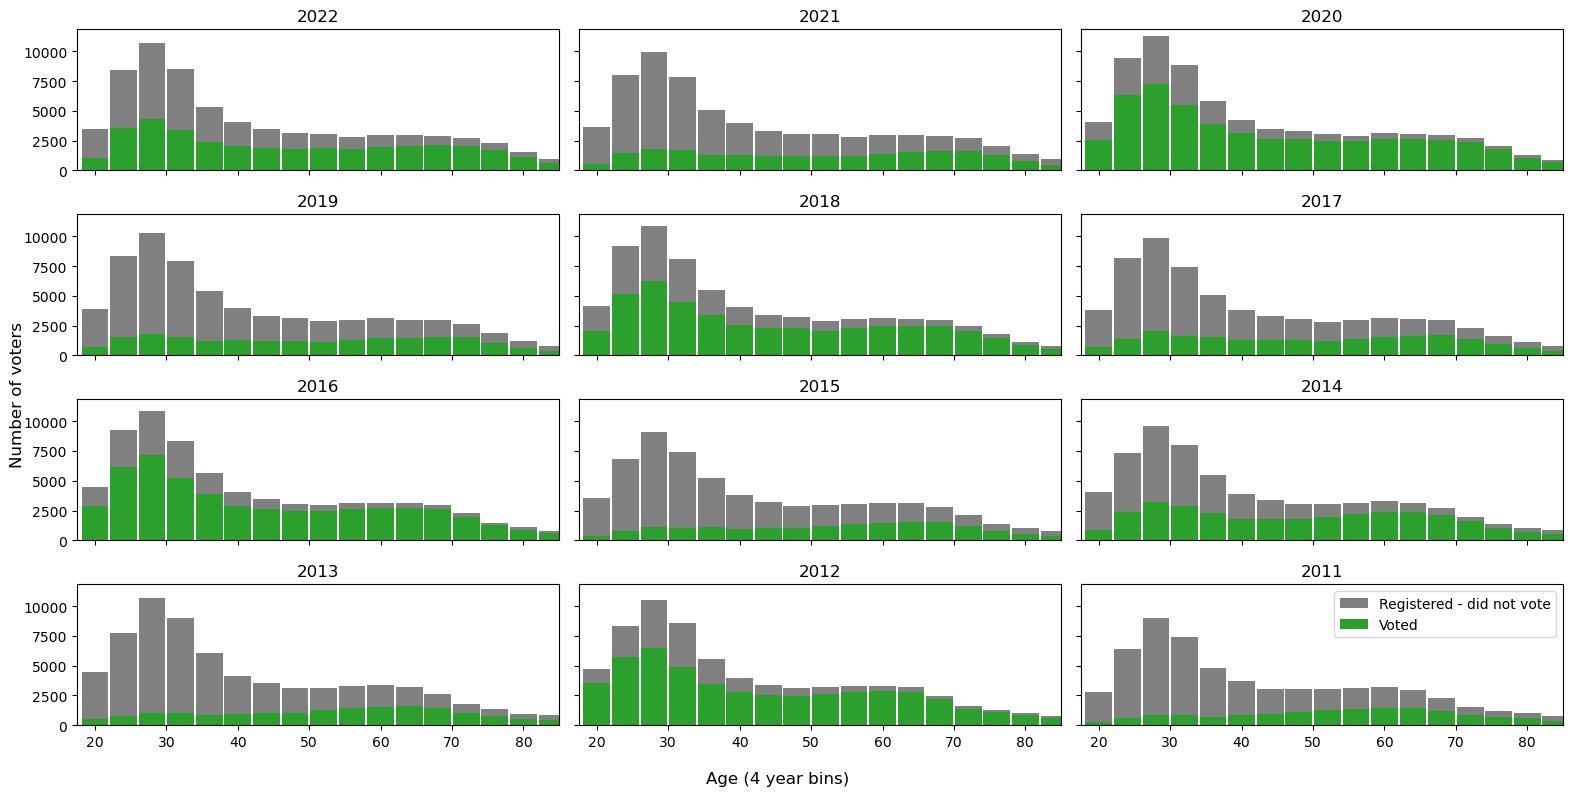

In [24]:
fig, axs = multi_year_bar(
    age_grouped, turnout_bar_graph, years_per_row=3, figsize=(16, 8)
)
fig.supxlabel("Age (4 year bins)")
fig.supylabel("Number of voters")
axs[-1][-1].legend()
axs[-1, -1].set_xlim([17.5, 85])
plt.tight_layout();
# plt.tight_layout()

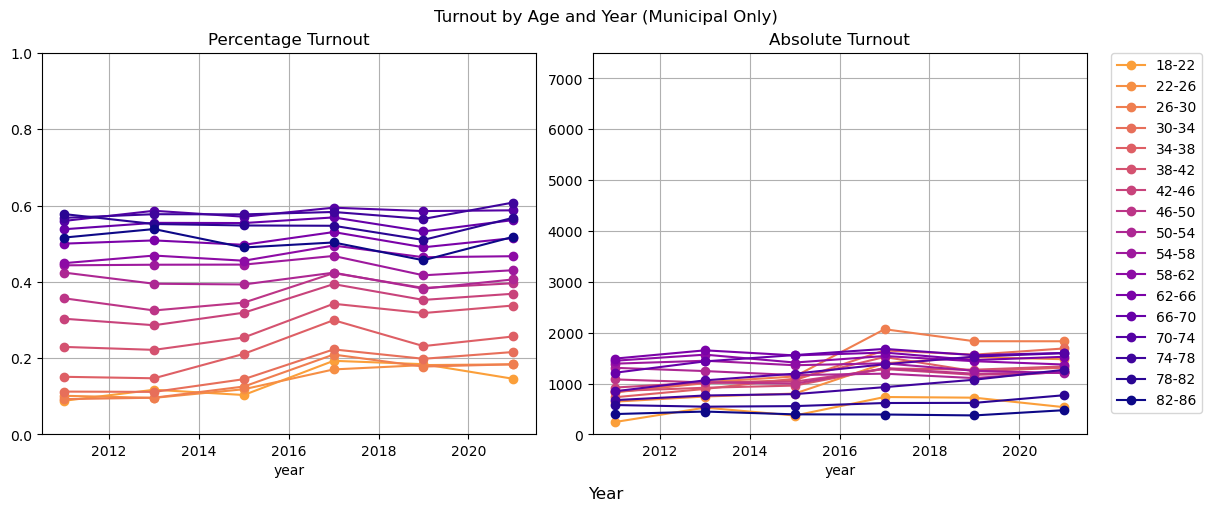

In [25]:
def line_plot_turnout_age(df, years):
    ages = np.arange(18, 85, 4)
    groups = [f"{i}-{i+4}" for i in ages]
    colors = plt.cm.plasma_r(ages / ages.max())

    fig, axs = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)
    for i, group in enumerate(groups):
        df.loc[years]["turnout"].xs(group, level=1).plot(
            label=group, style="o-", color=colors[i], ax=axs[0]
        )
        df.loc[years]["voted"].xs(group, level=1).plot(
            label=group, style="o-", color=colors[i], ax=axs[1]
        )

    axs[1].legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
    axs[0].set_title("Percentage Turnout")
    axs[1].set_title("Absolute Turnout")
    fig.supxlabel("Year")
    axs[0].grid()
    axs[1].grid()
    axs[0].set_ylim([0, 1])
    axs[1].set_ylim([0, 7500])
    return fig, axs


fig, axs = line_plot_turnout_age(age_grouped, MUNICIPAL_YEARS)
fig.suptitle("Turnout by Age and Year (Municipal Only)");

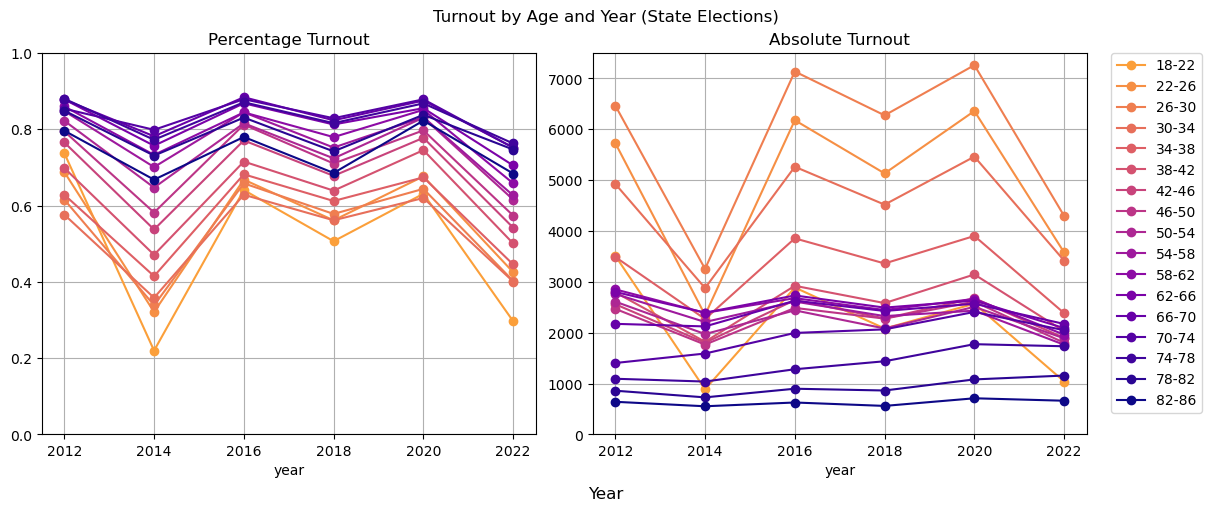

In [26]:
fig, axs = line_plot_turnout_age(age_grouped, STATE_YEARS)
fig.suptitle("Turnout by Age and Year (State Elections)");

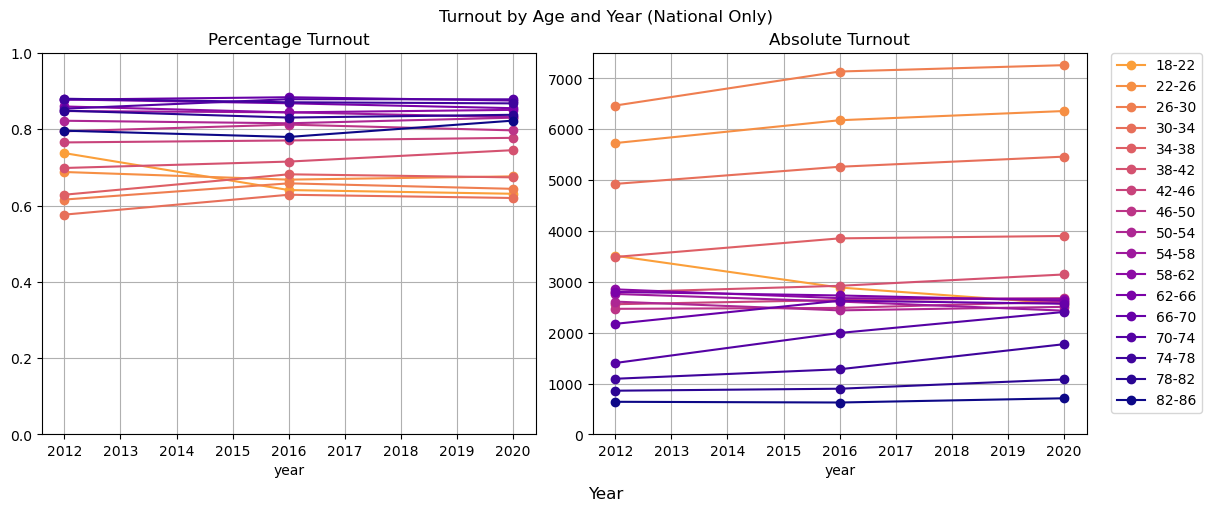

In [27]:
fig, axs = line_plot_turnout_age(age_grouped, NATIONAL_YEARS)
fig.suptitle("Turnout by Age and Year (National Only)");

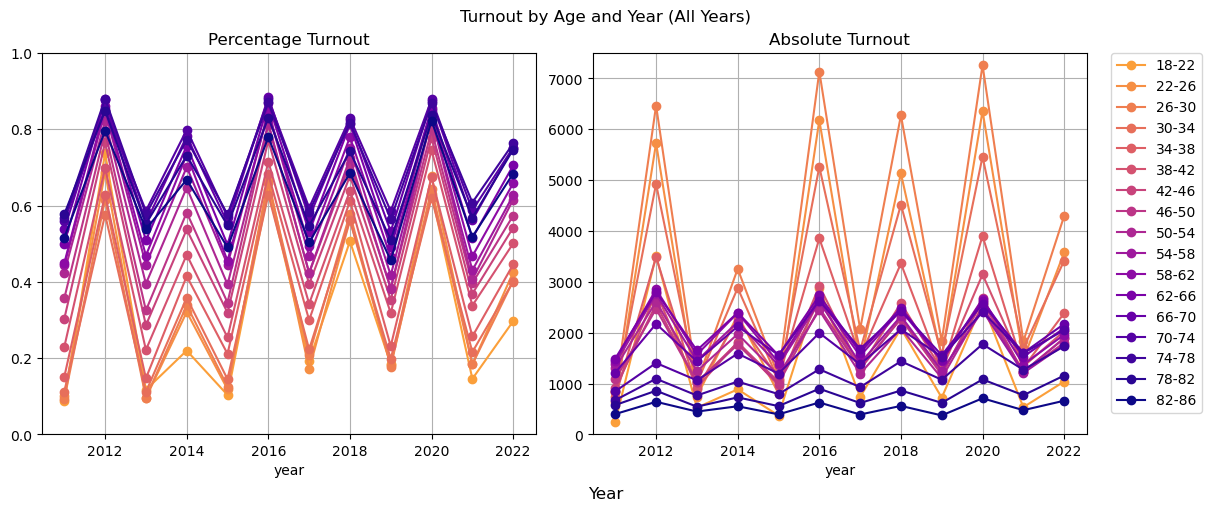

In [28]:
fig, axs = line_plot_turnout_age(age_grouped, ALL_YEARS)
fig.suptitle("Turnout by Age and Year (All Years)");